<i>Note, run</i> `conda install beautifulsoup4` <i>in Anaconda prompt before doing this lab. Alternatively, upload this to ArcGIS Online and run in ArcGIS Notebooks.</i>

# APIs & Web Scraping
Tons of web data useful for social scientists and humanists

* social media
* news media
* government publications
* organizational records

Two kinds of ways to get data off the web
* Webscraping - i.e. user-facing websites for humans
* APIs - i.e. application-facing, for computers

## What is an API?
* Application Programming Interface
* set of rules and procedures that facilitate interactions between computers and their applications
* allows users to query a remote database over the internet
* take on a variety of formats
* majority adhere to a particular style known as Representational State Transfer or REST
* "RESTful" APIs are convenient because we can use them to query databases using URLs

### HTML
HTTP (Hypertext Transfer Protocol) is one of the main ways computers communicate with each other on the Internet.

<u>Client-server computing model</u>: servers provide a service or resource, and clients request that service. Computers running browsers are examples of a client, while a host in the cloud running is an example of a server.

<u>Request-response protocol</u>: a client sends a request to a server, then receives a response

### requests library

The two most common types of HTTP requests are `GET` and `POST`

* `GET` - request data from the server
* `POST` - submit data to the server

Both types get a response, which can be formatted in HTML or other formats including JSON (similar to Python dictionaries).

#### Making a request

In [2]:
import requests

url = 'https://en.wikipedia.org/wiki/Request–response'
# Make the request and store the response
r = requests.get(url)

# Get the result
r.text

'<!DOCTYPE html>\n<html class="client-nojs vector-feature-language-in-header-enabled vector-feature-language-in-main-page-header-disabled vector-feature-sticky-header-disabled vector-feature-page-tools-pinned-disabled vector-feature-toc-pinned-clientpref-1 vector-feature-main-menu-pinned-disabled vector-feature-limited-width-clientpref-1 vector-feature-limited-width-content-enabled vector-feature-zebra-design-disabled vector-feature-custom-font-size-clientpref-0 vector-feature-client-preferences-disabled vector-feature-typography-survey-disabled vector-toc-available" lang="en" dir="ltr">\n<head>\n<meta charset="UTF-8">\n<title>Request–response - Wikipedia</title>\n<script>(function(){var className="client-js vector-feature-language-in-header-enabled vector-feature-language-in-main-page-header-disabled vector-feature-sticky-header-disabled vector-feature-page-tools-pinned-disabled vector-feature-toc-pinned-clientpref-1 vector-feature-main-menu-pinned-disabled vector-feature-limited-widt

In [3]:
# Also, check the status code to make sure it downloaded successfully (200 is what we want)
r.status_code

200

In [4]:

# set base url
base_url="https://itunes.apple.com/search"

search_params = {"term":"The Beatles",
                 "media": "music",
                 "entity": "album",
                 "attribute": "artistTerm"}  
# make request
r = requests.get(base_url, params=search_params)

print(r.url)

https://itunes.apple.com/search?term=The+Beatles&media=music&entity=album&attribute=artistTerm


In [5]:
# Inspect the content of the response, parsing the result as text
response_text= r.text
response_text

'\n\n\n{\n "resultCount":35,\n "results": [\n{"wrapperType":"collection", "collectionType":"Album", "artistId":136975, "collectionId":1713154518, "amgArtistId":3644, "artistName":"The Beatles", "collectionName":"The Beatles 1967–1970 (2023 Edition) [The Blue Album]", "collectionCensoredName":"The Beatles 1967–1970 (2023 Edition) [The Blue Album]", "artistViewUrl":"https://music.apple.com/us/artist/the-beatles/136975?uo=4", "collectionViewUrl":"https://music.apple.com/us/album/the-beatles-1967-1970-2023-edition-the-blue-album/1713154518?uo=4", "artworkUrl60":"https://is1-ssl.mzstatic.com/image/thumb/Music126/v4/c1/28/96/c128968a-e1c1-dd77-6548-61c1c3e64815/23UM1IM18072.rgb.jpg/60x60bb.jpg", "artworkUrl100":"https://is1-ssl.mzstatic.com/image/thumb/Music126/v4/c1/28/96/c128968a-e1c1-dd77-6548-61c1c3e64815/23UM1IM18072.rgb.jpg/100x100bb.jpg", "collectionExplicitness":"notExplicit", "trackCount":37, "copyright":"This Compilation ℗ 2023 Calderstone Productions Limited, a Division of Univers

In [6]:
import json
data = json.loads(response_text)
data

{'resultCount': 35,
 'results': [{'wrapperType': 'collection',
   'collectionType': 'Album',
   'artistId': 136975,
   'collectionId': 1713154518,
   'amgArtistId': 3644,
   'artistName': 'The Beatles',
   'collectionName': 'The Beatles 1967–1970 (2023 Edition) [The Blue Album]',
   'collectionCensoredName': 'The Beatles 1967–1970 (2023 Edition) [The Blue Album]',
   'artistViewUrl': 'https://music.apple.com/us/artist/the-beatles/136975?uo=4',
   'collectionViewUrl': 'https://music.apple.com/us/album/the-beatles-1967-1970-2023-edition-the-blue-album/1713154518?uo=4',
   'artworkUrl60': 'https://is1-ssl.mzstatic.com/image/thumb/Music126/v4/c1/28/96/c128968a-e1c1-dd77-6548-61c1c3e64815/23UM1IM18072.rgb.jpg/60x60bb.jpg',
   'artworkUrl100': 'https://is1-ssl.mzstatic.com/image/thumb/Music126/v4/c1/28/96/c128968a-e1c1-dd77-6548-61c1c3e64815/23UM1IM18072.rgb.jpg/100x100bb.jpg',
   'collectionExplicitness': 'notExplicit',
   'trackCount': 37,
   'copyright': 'This Compilation ℗ 2023 Caldersto

In [7]:
data.keys()

dict_keys(['resultCount', 'results'])

In [8]:
data['resultCount']

35

In [9]:
# Get first result
data['results'][0]

{'wrapperType': 'collection',
 'collectionType': 'Album',
 'artistId': 136975,
 'collectionId': 1713154518,
 'amgArtistId': 3644,
 'artistName': 'The Beatles',
 'collectionName': 'The Beatles 1967–1970 (2023 Edition) [The Blue Album]',
 'collectionCensoredName': 'The Beatles 1967–1970 (2023 Edition) [The Blue Album]',
 'artistViewUrl': 'https://music.apple.com/us/artist/the-beatles/136975?uo=4',
 'collectionViewUrl': 'https://music.apple.com/us/album/the-beatles-1967-1970-2023-edition-the-blue-album/1713154518?uo=4',
 'artworkUrl60': 'https://is1-ssl.mzstatic.com/image/thumb/Music126/v4/c1/28/96/c128968a-e1c1-dd77-6548-61c1c3e64815/23UM1IM18072.rgb.jpg/60x60bb.jpg',
 'artworkUrl100': 'https://is1-ssl.mzstatic.com/image/thumb/Music126/v4/c1/28/96/c128968a-e1c1-dd77-6548-61c1c3e64815/23UM1IM18072.rgb.jpg/100x100bb.jpg',
 'collectionExplicitness': 'notExplicit',
 'trackCount': 37,
 'copyright': 'This Compilation ℗ 2023 Calderstone Productions Limited, a Division of Universal Music Group',

In [11]:
# Process all the results
import pandas as pd

df = pd.DataFrame(data['results'])
df


,wrapperType,collectionType,artistId,collectionId,amgArtistId,artistName,collectionName,collectionCensoredName,artistViewUrl,collectionViewUrl,...,artworkUrl100,collectionExplicitness,trackCount,copyright,country,currency,releaseDate,primaryGenreName,collectionPrice,contentAdvisoryRating
0,collection,Album,136975,1713154518,3644.0,The Beatles,The Beatles 1967–1970 (2023 Edition) [The Blue...,The Beatles 1967–1970 (2023 Edition) [The Blue...,https://music.apple.com/us/artist/the-beatles/...,https://music.apple.com/us/album/the-beatles-1...,...,https://is1-ssl.mzstatic.com/image/thumb/Music...,notExplicit,37,This Compilation ℗ 2023 Calderstone Production...,USA,USD,2023-11-10T08:00:00Z,Rock,NaN,NaN
1,collection,Album,136975,1713066744,3644.0,The Beatles,The Beatles 1962–1966 (2023 Edition) [The Red ...,The Beatles 1962–1966 (2023 Edition) [The Red ...,https://music.apple.com/us/artist/the-beatles/...,https://music.apple.com/us/album/the-beatles-1...,...,https://is1-ssl.mzstatic.com/image/thumb/Music...,notExplicit,38,This Compilation ℗ 2023 Calderstone Production...,USA,USD,2023-11-10T08:00:00Z,Rock,NaN,NaN
2,collection,Album,136975,1440833098,3644.0,The Beatles,1,1,https://music.apple.com/us/artist/the-beatles/...,https://music.apple.com/us/album/1/1440833098?...,...,https://is1-ssl.mzstatic.com/image/thumb/Music...,notExplicit,27,This Compilation ℗ 2015 Calderstone Production...,USA,USD,2000-11-13T08:00:00Z,Rock,12.99,NaN
3,collection,Album,136975,1713197371,3644.0,The Beatles,Now And Then - Single,Now And Then - Single,https://music.apple.com/us/artist/the-beatles/...,https://music.apple.com/us/album/now-and-then-...,...,https://is1-ssl.mzstatic.com/image/thumb/Music...,notExplicit,3,℗ 2023 Calderstone Productions Limited (a divi...,USA,USD,2023-11-02T07:00:00Z,Rock,1.99,NaN
4,collection,Album,136975,1441133180,3644.0,The Beatles,The Beatles (The White Album),The Beatles (The White Album),https://music.apple.com/us/artist/the-beatles/...,https://music.apple.com/us/album/the-beatles-t...,...,https://is1-ssl.mzstatic.com/image/thumb/Music...,notExplicit,32,This Compilation ℗ 2009 Calderstone Production...,USA,USD,1968-11-22T08:00:00Z,Rock,19.99,NaN
5,collection,Album,136975,1441133100,3644.0,The Beatles,The Beatles 1967-1970 (The Blue Album),The Beatles 1967-1970 (The Blue Album),https://music.apple.com/us/artist/the-beatles/...,https://music.apple.com/us/album/the-beatles-1...,...,https://is1-ssl.mzstatic.com/image/thumb/Music...,notExplicit,29,This Compilation ℗ 2010 Calderstone Production...,USA,USD,1973-04-02T08:00:00Z,Rock,19.99,NaN
6,collection,Album,136975,1441132965,3644.0,The Beatles,The Beatles 1962-1966 (The Red Album),The Beatles 1962-1966 (The Red Album),https://music.apple.com/us/artist/the-beatles/...,https://music.apple.com/us/album/the-beatles-1...,...,https://is1-ssl.mzstatic.com/image/thumb/Music...,notExplicit,27,This Compilation ℗ 2010 Calderstone Production...,USA,USD,1973-04-02T08:00:00Z,Rock,19.99,NaN
7,collection,Album,136975,1436905161,3644.0,The Beatles,The Beatles (White Album) (Super Deluxe Editio...,The Beatles (White Album) (Super Deluxe Editio...,https://music.apple.com/us/artist/the-beatles/...,https://music.apple.com/us/album/the-beatles-w...,...,https://is1-ssl.mzstatic.com/image/thumb/Music...,notExplicit,107,This Compilation ℗ 2018 Calderstone Production...,USA,USD,1968-11-22T08:00:00Z,Rock,69.99,NaN
8,collection,Album,136975,1474815798,3644.0,The Beatles,Abbey Road (2019 Mix),Abbey Road (2019 Mix),https://music.apple.com/us/artist/the-beatles/...,https://music.apple.com/us/album/abbey-road-20...,...,https://is1-ssl.mzstatic.com/image/thumb/Music...,notExplicit,17,℗ 2019 Calderstone Productions Limited (a Divi...,USA,USD,1969-09-26T07:00:00Z,Rock,12.99,NaN
9,collection,Album,136975,1441164359,3644.0,The Beatles,Rubber Soul,Rubber Soul,https://music.apple.com/us/artist/the-beatles/...,https://music.apple.com/us/album/rubber-soul/1...,...,https://is1-ssl.mzstatic.com/image/thumb/Music...,notEx

## Why Webscrape?

Benefits:
* Pretty much any content that can be viewed on a webpage can be scraped. (https://epps.utdallas.edu/about/faculty/)
* No API needed
* No rate-limiting or authentication (usually)  

Challenges:
* Rarely tailored for researchers
* Messy, unstructured, inconsistent
* Entirely site-dependent

Webscraping vs. APIs rule of thumb:
* Check for API first. If the API is not available, scrape.*
* If the site allows you to do so, scrape.
* Wikipedia and IMDB both allow scraping, so those are easy sites to start with.

### HTML
HyperText Markup Language (HTML) is a language that most webpages are written in.

It is made up of tags like so:
```html
    <html>
        <head>
        </head>
        <body>
        </body>
    </html>
```

Other tags include:

* `<div>` - general division or area of the page
* `<b>` - bolds text
* `<i>` - italicizes text
* `<table>` - denotes a table on the page
* `<form>` - form for input

### The tools
1. [Requests](http://docs.python-requests.org/en/latest/user/quickstart/)
2. [Beautiful Soup](http://www.crummy.com/software/BeautifulSoup/bs4/doc/)

In [1]:
# import required modules
import requests
from bs4 import BeautifulSoup

### Step 1 - Make a GET request and read response HTML

In [12]:
# make a GET request
req = requests.get('https://house.texas.gov/members/')
# read the content of the server’s response
src = req.text

### Step 2 - Soup It
Now we use the `BeautifulSoup` function to parse the reponse into an HTML tree. This returns an object (called a soup object) which contains all of the HTML in the original document.

In [13]:
# parse the response into an HTML tree
soup = BeautifulSoup(src)
# take a look
print(soup.prettify()[:1000])

<!DOCTYPE html>
<html lang="en-US">
 <head>
  <title>
   Texas House of Representatives : House Members
  </title>
  <meta content="text/html; charset=utf-8" http-equiv="Content-Type"/>
  <meta content="Texas House of Representatives" name="author"/>
  <meta content="Texas House of Representatives, legislature, legislation, house, senate, bills, bill" name="keywords"/>
  <meta content="Website for the Texas House of Representatives.  Provides information on legislation, committees, Texas house, and session." name="description"/>
  <meta content="Legislation, State governments, Legislative Branch of Government, Bills" name="subject"/>
  <meta content="3f73f901329e0c55-4773827067868245-gdb26772d529ada4b-11" name="google-translate-customization"/>
  <meta content="Texas House of Representatives" property="og:title"/>
  <meta content="summary" property="og:type"/>
  <meta content="https://www.house.texas.gov" property="og:url"/>
  <meta content="https://www.house.texas.gov/_images/twitter/

### Step 3 - Find elements
BeautifulSoup has a number of functions to find things on a page. Like other webscraping tools, Beautiful Soup lets you find elements by their:

HTML tags
HTML Attributes
CSS Selectors
Let's search first for <b>HTML tags</b>.

The function `find_all` searches the soup tree to find all the elements with an a particular HTML tag, and returns all of those elements.

What does the example below do?

In [14]:
# find all elements in a certain tag
soup.find_all("a")

[<a href="#navigation">Skip to navigation</a>,
 <a href="#wrapper">Skip to the main content</a>,
 <a href="https://www.house.texas.gov/">
 <img alt="Texas House of Representatives" id="logo" src="/_images/nav-logo-small-new.png"/></a>,
 <a href="http://www.house.texas.gov/"><img alt="Texas House of Representatives" src="/_images/title.png" title="Texas House of Representatives"/><span>Texas House of Representatives</span></a>,
 <a class="about-us" href="/about-us/">About</a>,
 <a class="members" href="/members/">Members</a>,
 <a href="/members/speaker">Speaker</a>,
 <a href="/members/find-your-representative/">Find Your Rep.</a>,
 <a class="committees" href="/committees/">Committees</a>,
 <a class="research" href="/research/">Research</a>,
 <a class="resources" href="/resources/">Resources</a>,
 <a class="schedules" href="/schedules/">Schedules</a>,
 <a class="video-audio" href="/video-audio/">Video/Audio</a>,
 <a href="/video-audio/">Live Broadcasts</a>,
 <a href="/video-audio/committ

That's a lot! Many elements on a page will have the same html tag. For instance, if you search for everything with the a tag, you're likely to get a lot of stuff, much of which you don't want. What if we wanted to search for HTML tags ONLY with certain attributes, like particular CSS classes?

We can do this by adding an additional argument to the `find_all`

In the example below, we are finding all the a tags, and then filtering those with class = "sidemenu".

In [15]:
# Get only the 'a' tags in 'sidemenu' class
soup("a", class_="member-img")

[<a class="member-img" href="/members/member-page/?district=131"><img alt="House Member" class="no-img" src="photos/2100.jpg?v=88.33"/><br/><strong>Rep. Allen, Alma A.</strong></a>,
 <a class="member-img" href="/members/member-page/?district=121"><img alt="House Member" class="no-img" src="photos/3800.jpg?v=88.33"/><br/><strong>Rep. Allison, Steve</strong></a>,
 <a class="member-img" href="/members/member-page/?district=103"><img alt="House Member" class="no-img" src="photos/2150.jpg?v=88.33"/><br/><strong>Rep. Anchía, Rafael</strong></a>,
 <a class="member-img" href="/members/member-page/?district=56"><img alt="House Member" class="no-img" src="photos/2155.jpg?v=88.33"/><br/><strong>Rep. Anderson, Charles "Doc"</strong></a>,
 <a class="member-img" href="/members/member-page/?district=9"><img alt="House Member" class="no-img" src="photos/2330.jpg?v=88.33"/><br/><strong>Rep. Ashby, Trent</strong></a>,
 <a class="member-img" href="/members/member-page/?district=18"><img alt="House Member

In [16]:
# Alternatively can get the same results using CSS-style notation:
soup.select("a.member-img")

[<a class="member-img" href="/members/member-page/?district=131"><img alt="House Member" class="no-img" src="photos/2100.jpg?v=88.33"/><br/><strong>Rep. Allen, Alma A.</strong></a>,
 <a class="member-img" href="/members/member-page/?district=121"><img alt="House Member" class="no-img" src="photos/3800.jpg?v=88.33"/><br/><strong>Rep. Allison, Steve</strong></a>,
 <a class="member-img" href="/members/member-page/?district=103"><img alt="House Member" class="no-img" src="photos/2150.jpg?v=88.33"/><br/><strong>Rep. Anchía, Rafael</strong></a>,
 <a class="member-img" href="/members/member-page/?district=56"><img alt="House Member" class="no-img" src="photos/2155.jpg?v=88.33"/><br/><strong>Rep. Anderson, Charles "Doc"</strong></a>,
 <a class="member-img" href="/members/member-page/?district=9"><img alt="House Member" class="no-img" src="photos/2330.jpg?v=88.33"/><br/><strong>Rep. Ashby, Trent</strong></a>,
 <a class="member-img" href="/members/member-page/?district=18"><img alt="House Member

However, looking at the results, it seems that the District number is missing. Instead we need to search for the parent element. Using Chrome Dev-Tools, we can see that the parent element is a td (table column element) with a class of `members-img-center`.

In [17]:
# Get all the representative elements
soup.select('td.members-img-center')

[<td align="center" class="members-img-center">District 131<br/><a class="member-img" href="/members/member-page/?district=131"><img alt="House Member" class="no-img" src="photos/2100.jpg?v=88.33"/><br/><strong>Rep. Allen, Alma A.</strong></a></td>,
 <td align="center" class="members-img-center">District 121<br/><a class="member-img" href="/members/member-page/?district=121"><img alt="House Member" class="no-img" src="photos/3800.jpg?v=88.33"/><br/><strong>Rep. Allison, Steve</strong></a></td>,
 <td align="center" class="members-img-center">District 103<br/><a class="member-img" href="/members/member-page/?district=103"><img alt="House Member" class="no-img" src="photos/2150.jpg?v=88.33"/><br/><strong>Rep. Anchía, Rafael</strong></a></td>,
 <td align="center" class="members-img-center">District 56<br/><a class="member-img" href="/members/member-page/?district=56"><img alt="House Member" class="no-img" src="photos/2155.jpg?v=88.33"/><br/><strong>Rep. Anderson, Charles "Doc"</strong></a>

In [38]:
# For each of those member entities get their info
names = [m.get_text().replace('\xa0', '') for m in soup.select('a.member-img')]
names

['Rep.Allen, Alma A.',
 'Rep.Allison, Steve',
 'Rep.Anchía, Rafael',
 'Rep.Anderson, Charles "Doc"',
 'Rep.Ashby, Trent',
 'Rep.Bailes, Ernest',
 'Rep.Bell Jr., Cecil',
 'Rep.Bell, Keith',
 'Rep.Bernal, Diego M.',
 'Rep.Bhojani, Salman ',
 'Rep.Bonnen, Greg',
 'Rep.Bowers, Rhetta Andrews',
 'Rep.Bryant, John',
 'Rep.Buckley, Brad',
 'Rep.Bucy lll, John H.',
 'Rep.Bumgarner, Benjamin',
 'Rep.Burns, DeWayne',
 'Rep.Burrows, Dustin',
 'Rep.Button, Angie Chen',
 'Rep.Cain, Briscoe',
 'Rep.Campos, Elizabeth "Liz"',
 'Rep.Canales, Terry',
 'Rep.Capriglione, Giovanni',
 'Rep.Clardy, Travis',
 'Rep.Cole, Sheryl',
 'Rep.Collier, Nicole',
 'Rep.Cook, David',
 'Rep.Cortez, Philip',
 'Rep.Craddick, Tom',
 'Rep.Cunningham, Charles',
 'Rep.Darby, Drew',
 'Rep.Davis, Yvonne',
 'Rep.Dean, Jay',
 'Rep.DeAyala, Mano',
 'Rep.Dorazio, Mark',
 'Rep.Dutton Jr., Harold V.',
 'Rep.Flores, Lulu',
 'Rep.Frank, James',
 'Rep.Frazier, Frederick',
 'Rep.Gámez, Erin',
 'Rep.Garcia, Josey',
 'Rep.Gates, Gary',
 'Rep

In [42]:
districts = [d.find(text=True, recursive=False) for d in soup.find_all(class_ = 'members-img-center')]
districts

df_rep = pd.DataFrame({'Name': names, 'District': districts})
df_rep.sort_values(by=['District'])

,Name,District
142,"Rep.VanDeaver, Gary",District 1
54,"Rep.Harrison, Brian",District 10
70,"Rep.Jones, Venton",District 100
141,"Rep.Turner, Chris",District 101
112,"Rep.Ramos, Ana-Maria",District 102
...,...,...
25,"Rep.Collier, Nicole",District 95
26,"Rep.Cook, David",District 96
45,"Rep.Goldman, Craig",District 97
22,"Rep.Capriglione, Giovanni",District 98


<td align="center" class="members-img-center">District 131<br/><a class="member-img" href="/members/member-page/?district=131"><img alt="House Member" class="no-img" src="photos/2100.jpg?v=88.33"/><br/><strong>Rep. Allen, Alma A.</strong></a></td>

# Homework
## Undergrads

Use the [REST Countries API](https://restcountries.com/) to get a list of all the countries that have Spanish (language code="spa") as an official language. Print the name and population of each country in a nice-looking table.

In [46]:
import requests

url = 'https://restcountries.com/v3.1/all'
# Make the request and store the response
r = requests.get(url)

# Get the result
r.text

# r.status_code

'[{"name":{"common":"Turks and Caicos Islands","official":"Turks and Caicos Islands","nativeName":{"eng":{"official":"Turks and Caicos Islands","common":"Turks and Caicos Islands"}}},"tld":[".tc"],"cca2":"TC","ccn3":"796","cca3":"TCA","independent":false,"status":"officially-assigned","unMember":false,"currencies":{"USD":{"name":"United States dollar","symbol":"$"}},"idd":{"root":"+1","suffixes":["649"]},"capital":["Cockburn Town"],"altSpellings":["TC"],"region":"Americas","subregion":"Caribbean","languages":{"eng":"English"},"translations":{"ara":{"official":"جزر توركس وكايكوس","common":"جزر توركس وكايكوس"},"bre":{"official":"Inizi Turks ha Caicos","common":"Inizi Turks ha Caicos"},"ces":{"official":"Turks a Caicos","common":"Turks a Caicos"},"cym":{"official":"Turks and Caicos Islands","common":"Turks and Caicos Islands"},"deu":{"official":"Turks und Caicos Inseln","common":"Turks-und Caicosinseln"},"est":{"official":"Turksi ja Caicose saared","common":"Turks ja Caicos"},"fin":{"offi

In [87]:
import requests
import pandas as pd

# Set the base URL for the REST Countries API
base_url = "https://restcountries.com/v3.1/lang"

# Specify the language code for Spanish
language_code = "spa"

# Make a request to the API to get countries with Spanish as an official language
response = requests.get(f"{base_url}/{language_code}")

print(response.text)


[{"name":{"common":"Dominican Republic","official":"Dominican Republic","nativeName":{"spa":{"official":"República Dominicana","common":"República Dominicana"}}},"tld":[".do"],"cca2":"DO","ccn3":"214","cca3":"DOM","cioc":"DOM","independent":true,"status":"officially-assigned","unMember":true,"currencies":{"DOP":{"name":"Dominican peso","symbol":"$"}},"idd":{"root":"+1","suffixes":["809","829","849"]},"capital":["Santo Domingo"],"altSpellings":["DO"],"region":"Americas","subregion":"Caribbean","languages":{"spa":"Spanish"},"translations":{"ara":{"official":"جمهورية الدومينيكان","common":"جمهورية الدومينيكان"},"bre":{"official":"Republik Dominikan","common":"Republik Dominikan"},"ces":{"official":"Dominikánská republika","common":"Dominikánská republika"},"cym":{"official":"Gweriniaeth Dominica","common":"Gweriniaeth Dominica"},"deu":{"official":"Dominikanische Republik","common":"Dominikanische Republik"},"est":{"official":"Dominikaani Vabariik","common":"Dominikaani Vabariik"},"fin":{"

In [90]:
#response.status_code = 200
# Parse the JSON response
countries_data = response.json()

# Extract relevant information (name and population) for each country
country_info = []
for country in countries_data:
    name = country.get('name', {}).get('common', 'N/A')
    population = country.get('population', 'N/A')
    country_info.append({'Country': name, 'Population': population})

# Create a DataFrame from the extracted information
df = pd.DataFrame(country_info)


# Print the DataFrame
print("Countries where Spanish is an official language:")
print(df)


Countries where Spanish is an official language:
               Country  Population
0   Dominican Republic    10847904
1              Ecuador    17643060
2               Belize      397621
3                 Peru    32971846
4            Guatemala    16858333
5               Mexico   128932753
6                 Guam      168783
7       Western Sahara      510713
8          Puerto Rico     3194034
9           Costa Rica     5094114
10             Uruguay     3473727
11            Paraguay     7132530
12               Chile    19116209
13         El Salvador     6486201
14           Argentina    45376763
15            Colombia    50882884
16             Bolivia    11673029
17           Venezuela    28435943
18                Cuba    11326616
19               Spain    47351567
20              Panama     4314768
21            Honduras     9904608
22   Equatorial Guinea     1402985
23           Nicaragua     6624554


Use BeautifulSoup to scrape the [Texas Senate membership webpage](https://senate.texas.gov/directory.php) to get a list of the Texas State Senators.

Senator container not found.


## Grads

Use the [REST Countries API](https://restcountries.com/) to get a list of all the countries that have Spanish (language code="spa") as an official language. Print the name and population of each country. Have the table sorted by population, from largest to smallest, and use comma separation number formatting for the population (e.g. 1,000,000).

In [94]:
import requests
import pandas as pd

# Set the base URL for the REST Countries API
base_url = "https://restcountries.com/v3.1/lang"

# Specify the language code for Spanish
language_code = "spa"

# Make a request to the API to get countries with Spanish as an official language
response = requests.get(f"{base_url}/{language_code}")


# Parse the JSON response
countries_data = response.json()

# Extract relevant information (name and population) for each country
country_info = []
for country in countries_data:
    name = country.get('name', {}).get('common', 'N/A')
    population = country.get('population', 'N/A')
    country_info.append({'Country': name, 'Population': population})

# Create a DataFrame from the extracted information
df = pd.DataFrame(country_info)

# Sort the DataFrame by population in descending order
df['Population'] = df['Population'].astype(int)  # Convert population to integer for sorting
df = df.sort_values(by='Population', ascending=False)

# Format the population column with comma separation
df['Population'] = df['Population'].apply(lambda x: '{:,}'.format(x))

# Print the formatted DataFrame
print("Countries where Spanish is an official language (sorted by population):")
print(df.to_string(index=False))


Countries where Spanish is an official language (sorted by population):
           Country  Population
            Mexico 128,932,753
          Colombia  50,882,884
             Spain  47,351,567
         Argentina  45,376,763
              Peru  32,971,846
         Venezuela  28,435,943
             Chile  19,116,209
           Ecuador  17,643,060
         Guatemala  16,858,333
           Bolivia  11,673,029
              Cuba  11,326,616
Dominican Republic  10,847,904
          Honduras   9,904,608
          Paraguay   7,132,530
         Nicaragua   6,624,554
       El Salvador   6,486,201
        Costa Rica   5,094,114
            Panama   4,314,768
           Uruguay   3,473,727
       Puerto Rico   3,194,034
 Equatorial Guinea   1,402,985
    Western Sahara     510,713
            Belize     397,621
              Guam     168,783


Use BeautifulSoup to scrape the [Texas Senate membership webpage](https://senate.texas.gov/directory.php) to get a list of the Texas State Senator information. Create a list of Python dictionaries containing each Senator's name, district, and party

In [156]:
import requests
from bs4 import BeautifulSoup

# make a GET request
req = requests.get('https://senate.texas.gov/directory.php')
# read the content of the server’s response
src = req.text

# parse the response into an HTML tree
soup = BeautifulSoup(src)
# take a look
# print(soup.prettify()[:1000])

# find all elements in a certain tag
soup.find_all("a")

[<a class="skip-link" href="#main-content">Skip to main content</a>,
 <a href="?lang=en">ENGLISH</a>,
 <a href="?lang=es">ESPAÑOL</a>,
 <a href="index.php"><img alt="Seal of the Senate of the State of Texas" class="senseal" src="_assets/img/header_senseal_24.png"/></a>,
 <a href="index.php"><img alt="Seal of the Senate of the State of Texas" class="sensealmobile" src="_assets/img/header_senseal_24.png"/></a>,
 <a href="ltgov.php">Lt. Governor</a>,
 <a href="members.php">Senators</a>,
 <a href="sos.php">Secretary</a>,
 <a href="committees.php">Committees</a>,
 <a href="av-live.php">News &amp; Media</a>,
 <a href="vcenter.php">Visitors</a>,
 <a href="kids.php">For Kids</a>,
 <a href="ltgov.php"><img alt="Lt. Governor" id="nav_01_en.png" src="_assets/img/nav_01_en.png"/></a>,
 <a class="nav_sub_a" href="members.php">Members</a>,
 <a class="nav_sub_a" href="directory.php">Full Directory</a>,
 <a class="nav_sub_a" href="facts.php">Facts &amp; Figures</a>,
 <a class="nav_sub_a" href="seniori

In [164]:
soup(class_="md_sdp")

[<td class="md_sdp" colspan="2">
 <div><span class="monosp">Senator: <span class="prtspc">       </span></span><a href="member.php?d=1" id="dist1"><span class="prtbld">Bryan Hughes</span></a></div>
 <div class="md_lin"><span class="monosp">District: <span class="prtspc">      </span></span>01</div>
 <div><span class="monosp">Party:   <span class="prtspc">       </span></span>Republican</div>
 </td>,
 <td class="md_sdp" colspan="2">
 <div><span class="monosp">Senator: <span class="prtspc">       </span></span><a href="member.php?d=2" id="dist2"><span class="prtbld">Bob Hall</span></a></div>
 <div class="md_lin"><span class="monosp">District: <span class="prtspc">      </span></span>02</div>
 <div><span class="monosp">Party:   <span class="prtspc">       </span></span>Republican</div>
 </td>,
 <td class="md_sdp" colspan="2">
 <div><span class="monosp">Senator: <span class="prtspc">       </span></span><a href="member.php?d=3" id="dist3"><span class="prtbld">Robert Nichols</span></a></div

In [7]:
import requests
from bs4 import BeautifulSoup

# URL of the Texas Senate membership webpage
url = 'https://senate.texas.gov/directory.php'

# Send a GET request to the webpage
response = requests.get(url)

# Check if the request was successful (status code 200)
# response.status_code == 200
# Parse the HTML content of the webpage
soup = BeautifulSoup(response.content, 'html.parser')

# Find all cells with class 'md_sdp'
senator_cells = soup.find_all('td', class_='md_sdp')

# Initialize an empty list to store senator information
senators = []

# Iterate over senator cells
for senator_cell in senator_cells:
    # Extract senator's name, district, and party from the cell content
    name = senator_cell.select_one('.prtbld').text.strip()
    district = senator_cell.find('div', class_='md_lin').text.split(':')[1].strip()
    party = senator_cell.find_all('div')[2].text.strip().split('Party:')[1].strip()

    # Create a dictionary for each senator and add it to the list
    senator_info = {'Name': name, 'District': district, 'Party': party}
    senators.append(senator_info)

# Print the list of dictionaries
for senator in senators:
    print(senator)


{'Name': 'Bryan Hughes', 'District': '01', 'Party': 'Republican'}
{'Name': 'Bob Hall', 'District': '02', 'Party': 'Republican'}
{'Name': 'Robert Nichols', 'District': '03', 'Party': 'Republican'}
{'Name': 'Brandon Creighton', 'District': '04', 'Party': 'Republican'}
{'Name': 'Charles Schwertner', 'District': '05', 'Party': 'Republican'}
{'Name': 'Carol Alvarado', 'District': '06', 'Party': 'Democrat'}
{'Name': 'Paul Bettencourt', 'District': '07', 'Party': 'Republican'}
{'Name': 'Angela Paxton', 'District': '08', 'Party': 'Republican'}
{'Name': 'Kelly Hancock', 'District': '09', 'Party': 'Republican'}
{'Name': 'Phil King', 'District': '10', 'Party': 'Republican'}
{'Name': 'Mayes Middleton', 'District': '11', 'Party': 'Republican'}
{'Name': 'Tan Parker', 'District': '12', 'Party': 'Republican'}
{'Name': 'Borris L. Miles', 'District': '13', 'Party': 'Democrat'}
{'Name': 'Sarah Eckhardt', 'District': '14', 'Party': 'Democrat'}
{'Name': 'John Whitmire', 'District': '15', 'Party': 'Democrat

Convert this list of dictionaries to a pandas DataFrame and save it to a .CSV file.

In [8]:
import pandas as pd
# Convert the list of dictionaries to a pandas DataFrame
df = pd.DataFrame(senators)
df

,Name,District,Party
0,Bryan Hughes,01,Republican
1,Bob Hall,02,Republican
2,Robert Nichols,03,Republican
3,Brandon Creighton,04,Republican
4,Charles Schwertner,05,Republican
5,Carol Alvarado,06,Democrat
6,Paul Bettencourt,07,Republican
7,Angela Paxton,08,Republican
8,Kelly Hancock,09,Republican
9,Phil King,10,Republican


In [4]:
# Save the DataFrame to a CSV file
df.to_csv('senators_info.csv', index=False)

Use pandas to create a pie chart of Senate membership by party ([Hint](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.plot.pie.html))

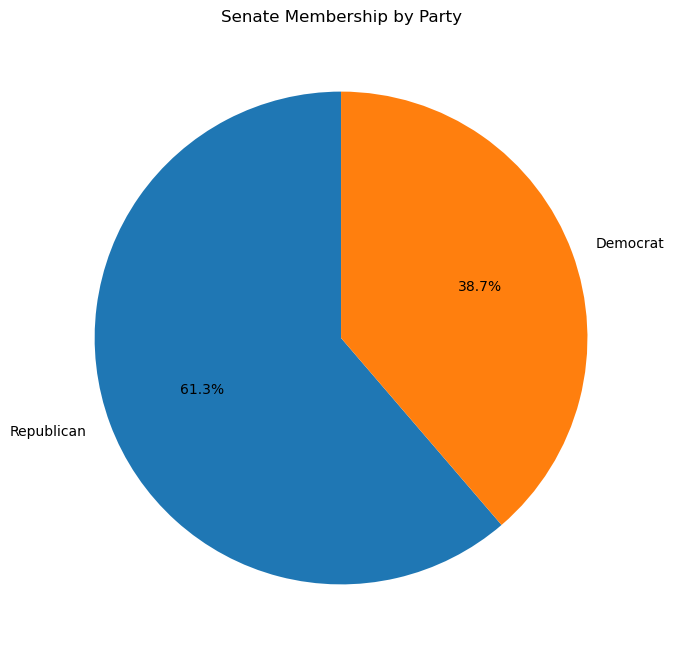

In [21]:
import matplotlib.pyplot as plt

# Count the number of senators per party
party_counts = df['Party'].value_counts()

# Plot a pie chart
party_counts.plot.pie(autopct='%1.1f%%', startangle=90, figsize=(8, 8))
plt.title('Senate Membership by Party')
plt.ylabel('')  # Remove the default 'Party' label on the y-axis
plt.show()